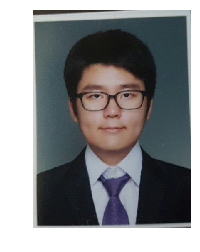

In [0]:
import cv2


path = '/content/drive/My Drive/'
img = plt.imread(path + 'me.JPG')
plt.imshow(img)
plt.axis('off')
plt.show()

# 대만 카드연체 분석

1. 주제 대만에서의 신용카드 고객의 데이터를 통해 향후 연체 여부를 파악하는 것이 목표 과거 데이터를 기반으로 특정 고객이 신뢰할 수 있는지 없는지 분류하고자 함 
2.선택 이유 데이터의 양도 알고리즘이 학습하기 위한 정도의 상당한 양이 제공됨 프로젝트를 통해 실제 연구한 머신러닝 또는 딥러닝 방법론이 신용평가 기업에서 상용화 가능한 부분이 큼 대출 서비스 부실화에 따른 사회문제 해결에 도움을 줄 수 있음
3.  데이터 설명 신용카드 사용에 대한 25개의 변수를 가진 30,000개의 데이터 최종 연체 여부(default)는 1(연체) 또는 0(정상 납부)으로 나타냄

# 평가 기준 <br>

1. 주어진 데이터로 최종 연체 여부를 판단하는 모델을 생성하시오. <br>
2. 모델 생성 필요시 데이터 탐색 및 전처리를 하시오. 
3. 모델 생성 및 성능 평가를 위하여 train과 test 데이터셋을 7:3의 비율로 분할하시오.<br>
4. 데이터셋 구성 시 샘플링 방법 선택할 것 적중률(accuracy)이 95%가 나오도록 최적의 모형을 찾으시오(알고리즘은 자유롭게 선택).<br>
5. 알고리즘은 머신러닝 3개 이상 모형을 자유롭게 선택하며, 딥러닝 모형은 딥러닝 모형 중 택일 성능 평가는 accuracy, AUC Score, F1 Score를 이용하되 성능 평가 값이 높은 모형을 제시하며, 필요시 GridSearch 기법을 이용하여 최적의 Hyper-parameter도 찾으시오.<br>
6. 결과 및 결과 도출 과정은 ppt로 정리하여 제출(희망자에 한해 발표 시 가산점) 2019.07.30 16:00까지 PPT 준비 및 제출 ex) 홍길동_0차 수행평가_1단계.ppt<br>
7. 1단계에서 도출된 결과를 이용하여 각 알고리즘의 장단점과 분석 시 문제점을 정리하시오. <br>
8. 또한 더 나은 성능을 위해서 고려해야 할 사항들을 도출하시오. <br>
9. 결과를 통해 모델에 가장 영향력을 주는 입력변수들은 어떤 것들이 있는지 그 변수들의 특징들로 유추할 수 있는 정보는? <br>
10. 또한 유사 적용 가능한 분야 및 사례들을 도출하시오. 결과 제출(희망자에 한해 발표 시 가산점 )<br>
11. 2019.07.31 16:00까지 PPT, Jupyter Notebook 준비 제출 ex) 홍길동_0차 수행평가_2단계.ppt, .ipynb 취합된 Jupyter Notebook 파일 모두 공유 예정

# 속성정보

이 연구에서는 응답 변수로 이진 변수 인 기본 지불 (예 : 1, 아니오 = 0)을 사용했습니다. 이 연구는 문헌을 검토하고 다음의 23 가지 변수를 설명 변수로 사용했다.<br> 
X1 : 주어진 크레딧 금액 (NT 달러) : 개인 소비자 크레딧과 가족 (보충) 크레딧을 모두 포함한다. <br>
X2 : 성별 (1 = 남성, 2 = 여성). <br>
X3 : 교육 (1 = 대학원, 2 = 대학, 3 = 고등학생, 4 = 기타). <br>
X4 : 결혼 상태 (1 = 결혼; 2 = 단일; 3 = 기타). <br>
X5 : 나이 (년). <br>
X6 - X11 : 과거 지불 내역. 우리는 과거의 월별 지불 기록 (2005 년 4 월에서 9 월까지)을 다음과 같이 추적했습니다 : X6 = 2005 년 9 월의 상환 상태; X7 = 2005 년 8 월 상환 상태; . . X11 = 2005 년 4 월의 상환 상태. 상환 상태의 측정 척도는 다음과 같습니다. -1 = 정당한 대가; 1 = 지불 지연 1 개월; 2 = 2 개월 지불 지연; . . .; 8 = 8 개월 지불 지연; 9 = 9 개월 이상 지불 지연. <br>
X12-X17 : 청구 명세서 금액 (NT 달러). X12 = 2005 년 9 월 청구서 명세서 금액; X13 = 2005 년 8 월 청구 명세서 명세서 금액; . . .; X17 = 2005 년 4 월 청구 명세서 금액 <br>
X18 - X23 : 이전 지불 금액 (NT 달러). X18 = 2005 년 9 월 지급액; X19 = 2005 년 8 월 지급 된 금액; . . ; X23 = 2005 년 4 월 지급액. 



#  Data Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd


path = '/content/drive/My Drive/lecture/l_d/p6/수행평가/'
df = pd.read_excel(path + 'default of credit card clients.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [0]:

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [0]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,-0.032061,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.055937,0.062739,0.053058,0.051209,0.039623,0.028670,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.011551,-0.009275,0.002556,-0.003029,-0.002497,0.002793,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.170745,-0.034475,0.055937,-0.011551,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,0.009137,0.013307,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.197136,-0.044750,0.062739,-0.009275,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,0.015932,0.022950,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.191323,-0.041227,0.053058,0.002556,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,-0.000968,0.002447,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,-0.180629,-0.039737,0.051209,-0.003029,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,-0.012569,0.002670,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
PAY_5,-0.170045,-0.038533,0.039623,-0.002497,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,-0.018581,-0.008614,0.003377,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850


# 데이터 전처리
1. pay_0 -> pay_1
2. education 값0, 5, 6 정의 x -> 4(기타)
3. marriage 값0 정의 x -> 3(기타)
4. pay 값  -2 정의 x --2, -1, 0 -> 0(정당한대가)

In [0]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [0]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [0]:
df = df.iloc[:, 1:]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
x = df.iloc[:, :-1]
x = x.values
print(x.shape)
y = df.iloc[:, -1:]
y = y.values
print(y.shape)

(30000, 24)
(30000, 1)


# 데이터 시각화

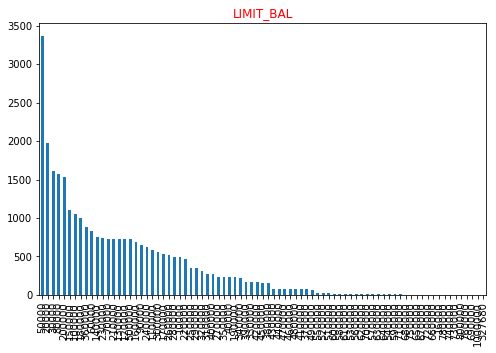

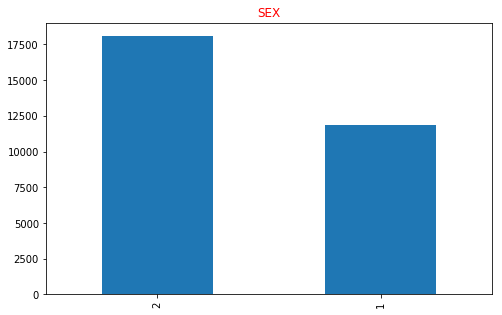

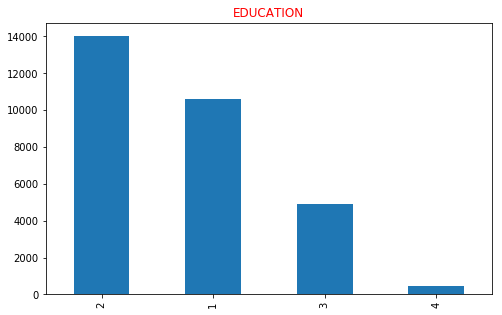

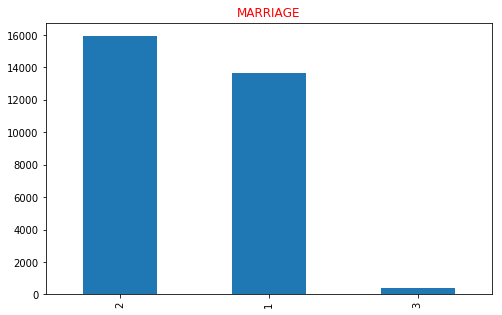

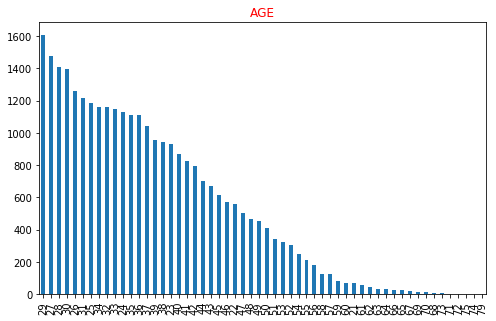

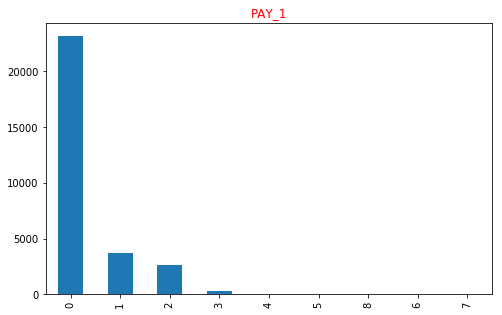

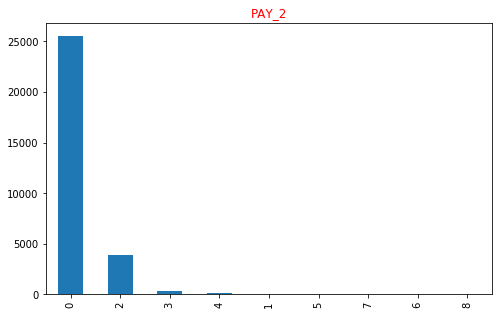

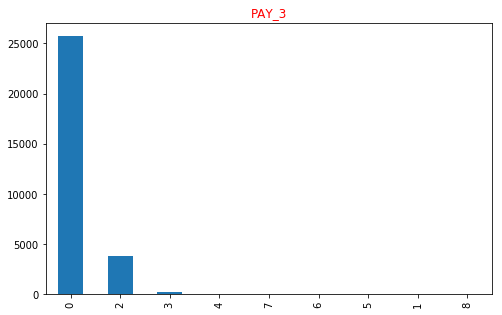

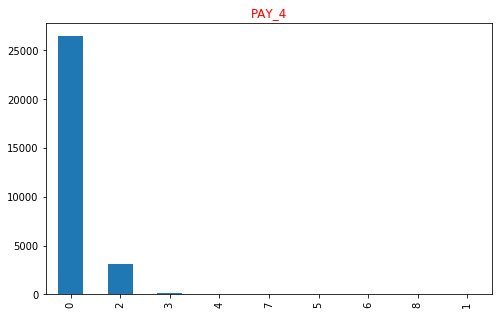

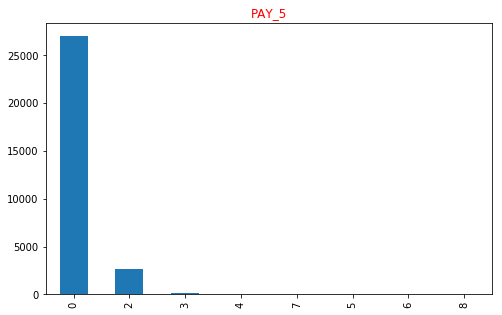

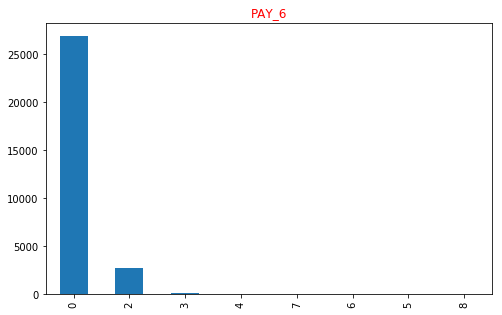

In [0]:
import matplotlib.pyplot as plt


for i, col in enumerate(df.iloc[:, :11]):
    
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind="bar")
    plt.title(col, color="red")
    plt.show()

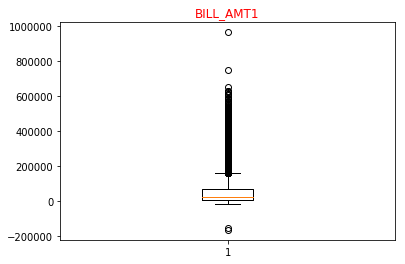

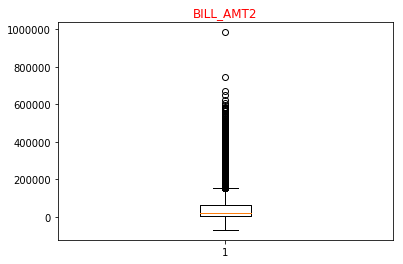

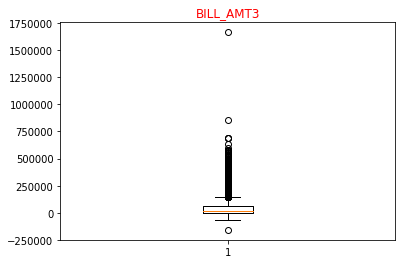

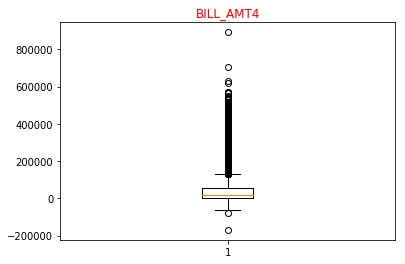

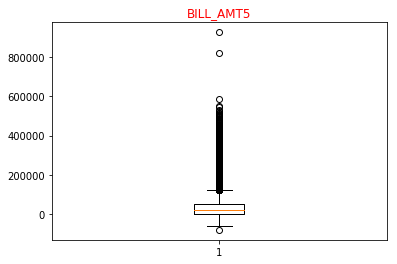

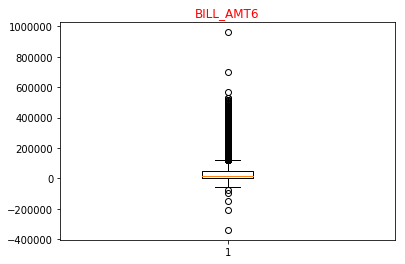

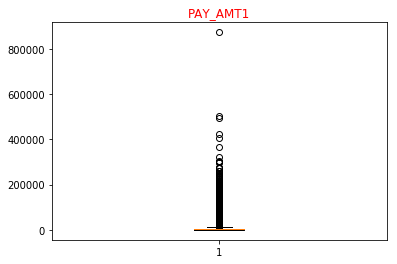

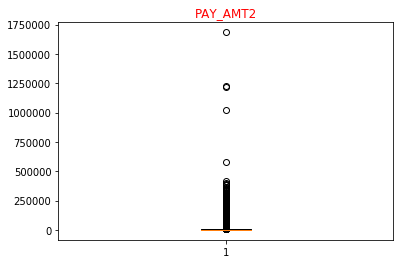

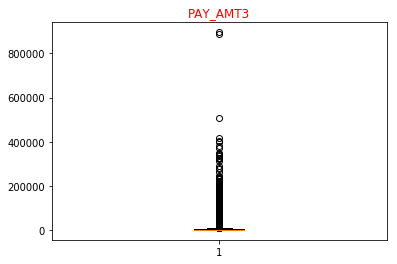

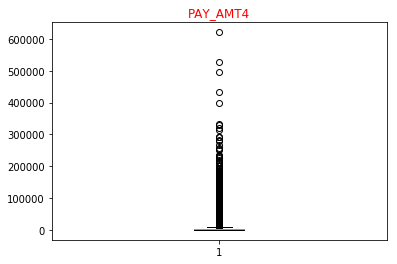

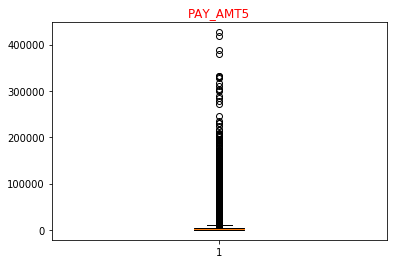

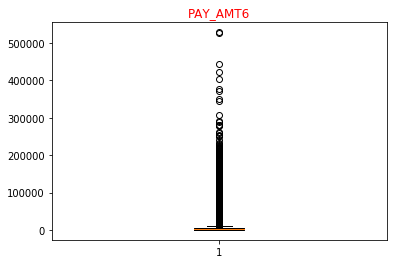

In [0]:
import matplotlib.pyplot as plt


for i, col in enumerate(df.iloc[:, 11:-1]):
    
    plt.boxplot(df[col])
    plt.title(col, color="red")
    plt.show()

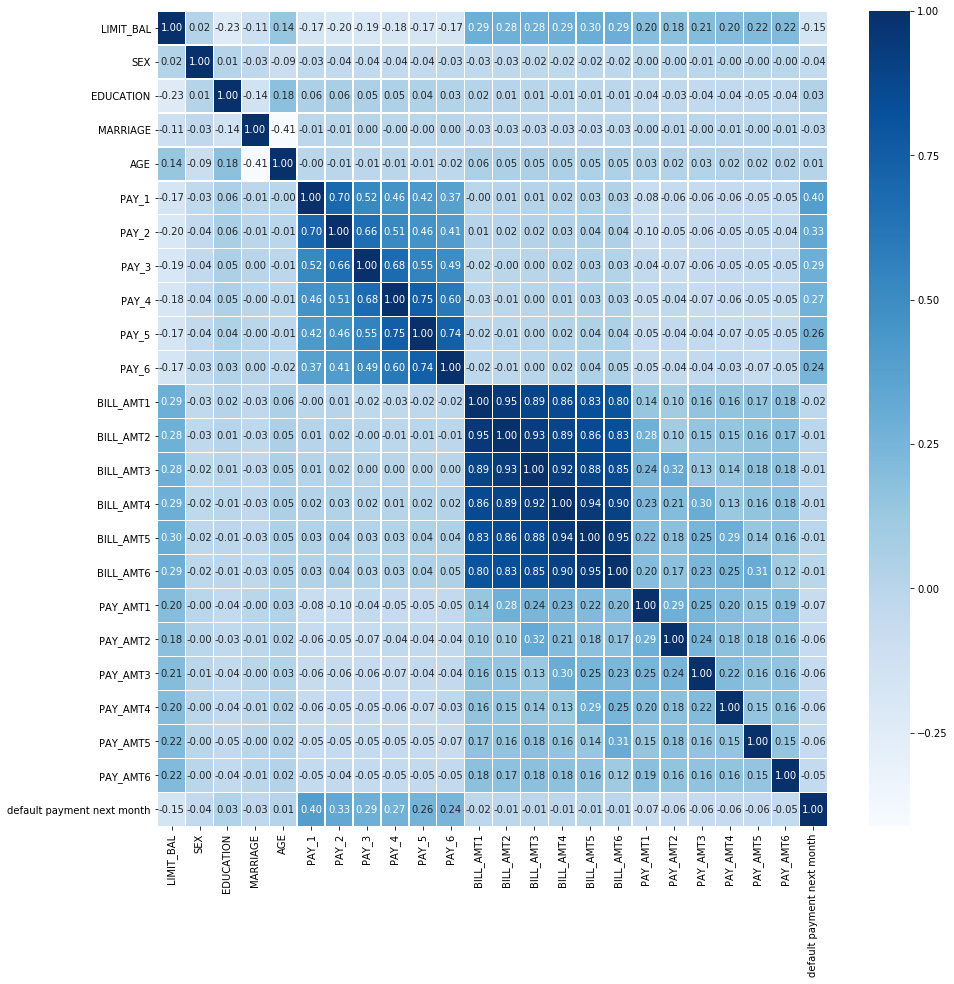

In [0]:
import seaborn as sns  


plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')

# 정규화

In [5]:
import numpy as np


x_1 = x.astype(np.float32)
x_1_max = x_1.max(0)
x_1_min = x_1.min(0)
x_1 = (x_1 - x_1_min)/(x_1_max - x_1_min)
x_1

array([[0.0000000e+00, 1.0101010e-02, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3334443e-05, 1.1111111e-01, 1.0000000e+00, ..., 1.6103060e-03,
        0.0000000e+00, 3.7831068e-03],
       [6.6668887e-05, 8.0808081e-02, 1.0000000e+00, ..., 1.6103060e-03,
        2.3445066e-03, 9.4577670e-03],
       ...,
       [9.9993330e-01, 2.0202020e-02, 0.0000000e+00, ..., 6.7632850e-03,
        4.6890131e-03, 5.8638155e-03],
       [9.9996668e-01, 7.0707068e-02, 0.0000000e+00, ..., 3.1014492e-03,
        1.2417444e-01, 3.4123624e-03],
       [1.0000000e+00, 4.0404040e-02, 0.0000000e+00, ..., 1.6103060e-03,
        2.3445066e-03, 1.8915534e-03]], dtype=float32)

# 데이터 분리

In [0]:
from sklearn.model_selection import train_test_split


np.random.seed(20190730)

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3,
                                                    stratify = y)

# DNN설계 및 학습 -> acc=0.821, f1=0.466, auc=0.770

In [0]:
from keras.models import Sequential
from keras.layers import Dense





model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, batch_size=128, epochs=500,
                    validation_data=(x_test, y_test))

Train on 21000 samples, validate on 9000 samples
Epoch 1/500
21000/21000 [==============================] - 1s 57us/step - loss: 0.1469 - acc: 0.8039 - val_loss: 0.1386 - val_acc: 0.8176
Epoch 2/500
21000/21000 [==============================] - 1s 39us/step - loss: 0.1382 - acc: 0.8180 - val_loss: 0.1374 - val_acc: 0.8190
Epoch 3/500
21000/21000 [==============================] - 1s 39us/step - loss: 0.1374 - acc: 0.8193 - val_loss: 0.1425 - val_acc: 0.8114
Epoch 4/500
21000/21000 [==============================] - 1s 39us/step - loss: 0.1373 - acc: 0.8191 - val_loss: 0.1367 - val_acc: 0.8202
Epoch 5/500
21000/21000 [==============================] - 1s 39us/step - loss: 0.1368 - acc: 0.8210 - val_loss: 0.1378 - val_acc: 0.8200
Epoch 6/500
21000/21000 [==============================] - 1s 40us/step - loss: 0.1366 - acc: 0.8219 - val_loss: 0.1370 - val_acc: 0.8169
Epoch 7/500
21000/21000 [==============================] - 1s 39us/step - loss: 0.1362 - acc: 0.8221 - val_loss: 0.1360 - v

In [0]:
val_precision = np.array(history.history['val_precision'])
val_recall = np.array(history.history['val_recall'])
f1_score = 2 * (val_precision*val_recall)/(val_precision + val_recall)
print(f1_score)
f1_score[-1]

[0.47723708 0.5        0.5007757  0.48273635 0.4935555  0.4984365
 0.5041146  0.5147629  0.47252384 0.48975676 0.46328437 0.5019994
 0.4911392  0.4594232  0.50717705 0.46686447 0.4562334  0.4930818
 0.47935483 0.4792538  0.4506568  0.49238417 0.47548383 0.36751497
 0.46686068]


0.46686068

# 시각화

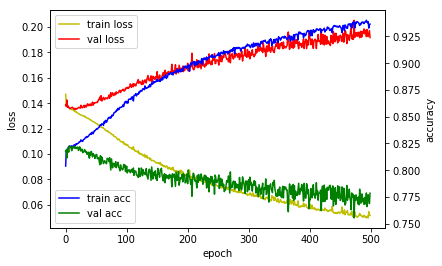

In [0]:
import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

W0731 05:31:10.190035 140687815587712 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 21000 samples, validate on 9000 samples
Epoch 1/25
21000/21000 [==============================] - 1s 48us/sample - loss: 0.1482 - acc: 0.8038 - precision: 0.6321 - recall: 0.2704 - val_loss: 0.1387 - val_acc: 0.8166 - val_precision: 0.6257 - val_recall: 0.4249
Epoch 2/25
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1385 - acc: 0.8172 - precision: 0.6485 - recall: 0.3789 - val_loss: 0.1373 - val_acc: 0.8183 - val_precision: 0.6651 - val_recall: 0.3601
Epoch 3/25
21000/21000 [==============================] - 1s 37us/sample - loss: 0.1375 - acc: 0.8203 - precision: 0.6642 - recall: 0.3793 - val_loss: 0.1371 - val_acc: 0.8200 - val_precision: 0.6462 - val_recall: 0.4119
Epoch 4/25
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1376 - acc: 0.8191 - precision: 0.6587 - recall: 0.3785 - val_loss: 0.1367 - val_acc: 0.8209 - val_precision: 0.6664 - val_recall: 0.3812
Epoch 5/25
21000/21000 [==============================] - 1s 37us/s

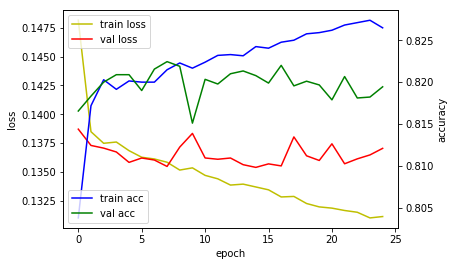

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=25,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

## DNN  f1-score

In [0]:
val_precision = np.array(history.history['val_precision'])
val_recall = np.array(history.history['val_recall'])
f1_score = 2 * (val_precision*val_recall)/(val_precision + val_recall)
print(f1_score)
f1_score[-1]

[0.51256573 0.49999994 0.5056282  0.48136243 0.49484533 0.5051484
 0.49349827 0.49493033 0.46164155 0.5102587  0.50291324 0.5068787
 0.4735467  0.49511194 0.48340315 0.47062683 0.48900223 0.50015414
 0.48737374 0.48929477 0.48505825 0.47671768 0.45779118 0.4500675
 0.48207423]


0.48207423

# RandomForestClassifier acc=0.814, f1=0.400, auc=0.769

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=50)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)


y_pred_rf_2 = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf_2))
print(classification_report(y_test,y_pred_rf_2))
print('acc : ', accuracy_score(y_test, y_pred_rf_2))
print('f1 : ',f1_score(y_test, y_pred_rf_2))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[6769  240]
 [1433  558]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      7009
           1       0.70      0.28      0.40      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.76      0.62      0.65      9000
weighted avg       0.80      0.81      0.78      9000

('acc : ', 0.8141111111111111)
('f1 : ', 0.4001434205808534)


In [0]:
sorted(zip(rf.feature_importances_, df.columns), reverse=True)

[(0.26472136939448576, 'PAY_1'),
 (0.2036959880227638, 'PAY_2'),
 (0.1431048768162902, 'PAY_4'),
 (0.11983353222430079, 'PAY_3'),
 (0.1108086068301344, 'PAY_5'),
 (0.038110325449124974, 'LIMIT_BAL'),
 (0.02907278360602174, 'PAY_6'),
 (0.019481963372773532, 'PAY_AMT1'),
 (0.018877470825803485, 'PAY_AMT2'),
 (0.014667890429876016, 'PAY_AMT3'),
 (0.008868582377272687, 'PAY_AMT6'),
 (0.006234923729216492, 'PAY_AMT4'),
 (0.006103855735990125, 'PAY_AMT5'),
 (0.003528568189080499, 'BILL_AMT1'),
 (0.003157764353455718, 'BILL_AMT6'),
 (0.002894476432491823, 'BILL_AMT2'),
 (0.0023640510255471064, 'BILL_AMT4'),
 (0.0018850415957200291, 'BILL_AMT3'),
 (0.0014897939938094348, 'BILL_AMT5'),
 (0.0007823200525615756, 'AGE'),
 (0.0001707378398310787, 'MARRIAGE'),
 (0.00014507770344864316, 'EDUCATION'),
 (0.0, 'SEX')]

# AdaBoost acc=0.818, f1=0.443, auc=0.769

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
adb = AdaBoostClassifier(n_estimators=50)
adb.fit(x_train, y_train)

y_pred_adb = adb.predict_proba(x_test)[:, 1]
fpr_adb, tpr_adb, thresholds_adb = roc_curve(y_test, y_pred_adb)
auc_adb = auc(fpr_adb, tpr_adb)


y_pred_adb_2 = adb.predict(x_test)
print(confusion_matrix(y_test,y_pred_adb_2))
print(classification_report(y_test,y_pred_adb_2))
print('acc : ', accuracy_score(y_test, y_pred_adb_2))
print('f1 : ',f1_score(y_test, y_pred_adb_2))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[6712  297]
 [1340  651]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.33      0.44      1991

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000

('acc : ', 0.8181111111111111)
('f1 : ', 0.44300782579108544)


In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

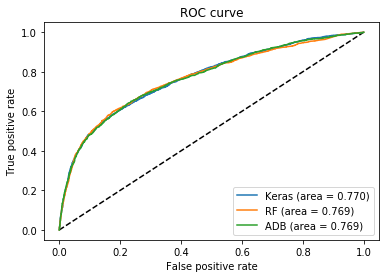

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_adb, tpr_adb, label='ADB (area = {:.3f})'.format(auc_adb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 결과<br>
1. 정확도 미달(81~82%)
2. 개선방향 -> 데이터 전처리 개선
3. DNN 구조 개선


# 0.1 DNN 재설계 시도 -> 큰 개선 없음

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 47us/sample - loss: 0.1807 - acc: 0.7790 - precision: 0.5882 - recall: 0.0022 - val_loss: 0.1630 - val_acc: 0.7821 - val_precision: 0.8409 - val_recall: 0.0186
Epoch 2/50
21000/21000 [==============================] - 1s 35us/sample - loss: 0.1562 - acc: 0.7888 - precision: 0.6830 - recall: 0.0840 - val_loss: 0.1502 - val_acc: 0.7976 - val_precision: 0.6512 - val_recall: 0.1828
Epoch 3/50
21000/21000 [==============================] - 1s 33us/sample - loss: 0.1484 - acc: 0.8001 - precision: 0.6536 - recall: 0.2047 - val_loss: 0.1463 - val_acc: 0.8018 - val_precision: 0.6349 - val_recall: 0.2446
Epoch 4/50
21000/21000 [==============================] - 1s 34us/sample - loss: 0.1455 - acc: 0.8034 - precision: 0.6445 - recall: 0.2482 - val_loss: 0.1445 - val_acc: 0.8052 - val_precision: 0.6362 - val_recall: 0.2793
Epoch 5/50
21000/21000 [==============================] - 1s 33us/s

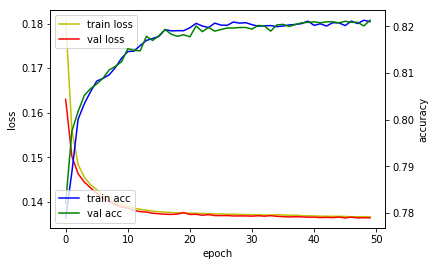

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(10, input_shape=((x_train.shape[1],)), activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 46us/sample - loss: 0.1791 - acc: 0.7783 - precision: 0.4713 - recall: 0.0177 - val_loss: 0.1578 - val_acc: 0.7852 - val_precision: 0.7959 - val_recall: 0.0392
Epoch 2/50
21000/21000 [==============================] - 1s 36us/sample - loss: 0.1519 - acc: 0.7929 - precision: 0.6832 - recall: 0.1188 - val_loss: 0.1472 - val_acc: 0.8014 - val_precision: 0.6667 - val_recall: 0.2049
Epoch 3/50
21000/21000 [==============================] - 1s 36us/sample - loss: 0.1452 - acc: 0.8037 - precision: 0.6615 - recall: 0.2301 - val_loss: 0.1436 - val_acc: 0.8060 - val_precision: 0.6526 - val_recall: 0.2632
Epoch 4/50
21000/21000 [==============================] - 1s 34us/sample - loss: 0.1427 - acc: 0.8070 - precision: 0.6495 - recall: 0.2764 - val_loss: 0.1420 - val_acc: 0.8078 - val_precision: 0.6372 - val_recall: 0.3044
Epoch 5/50
21000/21000 [==============================] - 1s 33us/s

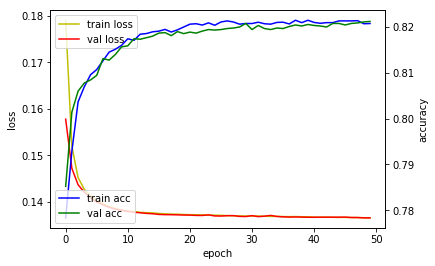

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(20, input_shape=((x_train.shape[1],)), activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 50us/sample - loss: 0.1630 - acc: 0.7781 - precision: 0.4928 - recall: 0.1098 - val_loss: 0.1445 - val_acc: 0.8063 - val_precision: 0.6610 - val_recall: 0.2557
Epoch 2/50
21000/21000 [==============================] - 1s 34us/sample - loss: 0.1423 - acc: 0.8071 - precision: 0.6560 - recall: 0.2689 - val_loss: 0.1410 - val_acc: 0.8102 - val_precision: 0.6380 - val_recall: 0.3285
Epoch 3/50
21000/21000 [==============================] - 1s 34us/sample - loss: 0.1398 - acc: 0.8120 - precision: 0.6583 - recall: 0.3115 - val_loss: 0.1394 - val_acc: 0.8138 - val_precision: 0.6393 - val_recall: 0.3631
Epoch 4/50
21000/21000 [==============================] - 1s 35us/sample - loss: 0.1385 - acc: 0.8159 - precision: 0.6596 - recall: 0.3466 - val_loss: 0.1379 - val_acc: 0.8159 - val_precision: 0.6541 - val_recall: 0.3561
Epoch 5/50
21000/21000 [==============================] - 1s 33us/s

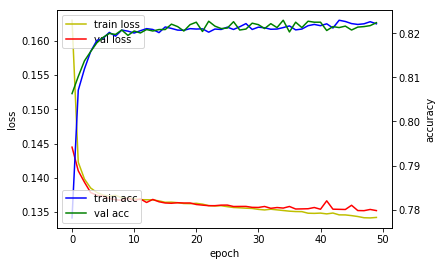

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(100, input_shape=((x_train.shape[1],)), activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 54us/sample - loss: 0.1772 - acc: 0.7670 - precision: 0.2700 - recall: 0.0312 - val_loss: 0.1499 - val_acc: 0.7977 - val_precision: 0.6856 - val_recall: 0.1577
Epoch 2/50
21000/21000 [==============================] - 1s 37us/sample - loss: 0.1439 - acc: 0.8052 - precision: 0.6524 - recall: 0.2558 - val_loss: 0.1414 - val_acc: 0.8086 - val_precision: 0.6306 - val_recall: 0.3250
Epoch 3/50
21000/21000 [==============================] - 1s 37us/sample - loss: 0.1406 - acc: 0.8103 - precision: 0.6351 - recall: 0.3350 - val_loss: 0.1398 - val_acc: 0.8106 - val_precision: 0.6383 - val_recall: 0.3315
Epoch 4/50
21000/21000 [==============================] - 1s 39us/sample - loss: 0.1393 - acc: 0.8129 - precision: 0.6407 - recall: 0.3509 - val_loss: 0.1392 - val_acc: 0.8131 - val_precision: 0.6272 - val_recall: 0.3827
Epoch 5/50
21000/21000 [==============================] - 1s 36us/s

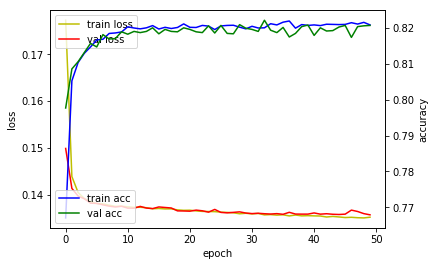

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(16, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 과대적합 발생

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 52us/sample - loss: 0.1534 - acc: 0.7975 - precision: 0.6458 - recall: 0.1869 - val_loss: 0.1414 - val_acc: 0.8104 - val_precision: 0.6217 - val_recall: 0.3656
Epoch 2/50
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1390 - acc: 0.8145 - precision: 0.6468 - recall: 0.3552 - val_loss: 0.1382 - val_acc: 0.8156 - val_precision: 0.6272 - val_recall: 0.4098
Epoch 3/50
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1377 - acc: 0.8188 - precision: 0.6565 - recall: 0.3789 - val_loss: 0.1372 - val_acc: 0.8197 - val_precision: 0.6538 - val_recall: 0.3928
Epoch 4/50
21000/21000 [==============================] - 1s 37us/sample - loss: 0.1375 - acc: 0.8197 - precision: 0.6623 - recall: 0.3774 - val_loss: 0.1371 - val_acc: 0.8192 - val_precision: 0.6634 - val_recall: 0.3712
Epoch 5/50
21000/21000 [==============================] - 1s 37us/s

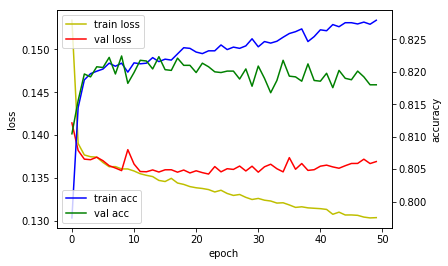

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(128, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 1s 56us/sample - loss: 0.1631 - acc: 0.7863 - precision: 0.5973 - recall: 0.1044 - val_loss: 0.1418 - val_acc: 0.8077 - val_precision: 0.6248 - val_recall: 0.3270
Epoch 2/50
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1402 - acc: 0.8122 - precision: 0.6461 - recall: 0.3341 - val_loss: 0.1385 - val_acc: 0.8134 - val_precision: 0.6538 - val_recall: 0.3330
Epoch 3/50
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1383 - acc: 0.8165 - precision: 0.6535 - recall: 0.3630 - val_loss: 0.1376 - val_acc: 0.8177 - val_precision: 0.6444 - val_recall: 0.3923
Epoch 4/50
21000/21000 [==============================] - 1s 38us/sample - loss: 0.1378 - acc: 0.8178 - precision: 0.6553 - recall: 0.3720 - val_loss: 0.1372 - val_acc: 0.8184 - val_precision: 0.6445 - val_recall: 0.3998
Epoch 5/50
21000/21000 [==============================] - 1s 37us/s

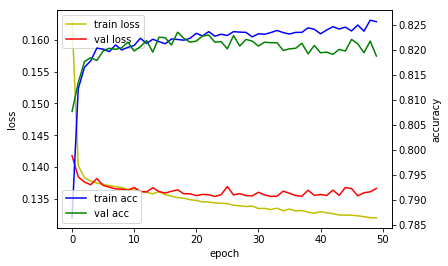

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(64, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선 시도 1 - 주성분 분석 -> 큰 변화없음

In [0]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95)
x_3 = pca.fit_transform(x_1)  # PCA 계산 후 투영

print('선택한 차원(픽셀) 수 :')
print( pca.n_components_)
print(x_3)
x_3.shape



선택한 차원(픽셀) 수 :
8
[[-0.40457857 -0.1879457  -0.01413775 ...  0.17140976  0.04488652
  -0.23632267]
 [-0.3951435   0.20432132  0.19950952 ...  0.02959605 -0.053381
  -0.0083891 ]
 [-0.3947499   0.16655935  0.16269623 ... -0.07451549  0.03372232
   0.01540575]
 ...
 [ 0.6164629   0.12345787  0.23940684 ... -0.10499397  0.04500332
  -0.45380715]
 [ 0.5973925  -0.45216414  0.18445767 ...  0.04006691  0.03447989
  -0.04089453]
 [ 0.602062   -0.30905738 -0.09635701 ... -0.07783964  0.1193232
   0.02709468]]


(30000, 8)

Train on 21000 samples, validate on 9000 samples
Epoch 1/500
21000/21000 [==============================] - 3s 155us/step - loss: 0.1488 - acc: 0.7997 - val_loss: 0.1420 - val_acc: 0.8053
Epoch 2/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1416 - acc: 0.8058 - val_loss: 0.1413 - val_acc: 0.8033
Epoch 3/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1409 - acc: 0.8069 - val_loss: 0.1414 - val_acc: 0.8056
Epoch 4/500
21000/21000 [==============================] - 1s 46us/step - loss: 0.1403 - acc: 0.8060 - val_loss: 0.1403 - val_acc: 0.8049
Epoch 5/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1403 - acc: 0.8062 - val_loss: 0.1407 - val_acc: 0.8069
Epoch 6/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1399 - acc: 0.8071 - val_loss: 0.1403 - val_acc: 0.8060
Epoch 7/500
21000/21000 [==============================] - 1s 46us/step - loss: 0.1396 - acc: 0.8075 - val_loss: 0.1400 - 

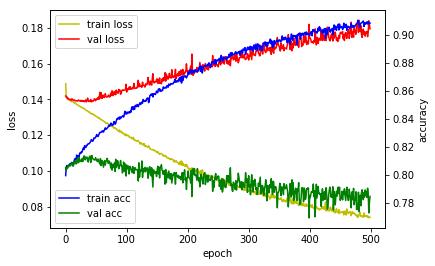

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


np.random.seed(20190730)

x_train, x_test, y_train, y_test = train_test_split(x_3, y, test_size=0.3,
                                                    stratify = y)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=500,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선시도 2 - 표준화 -> acc하락

Train on 21000 samples, validate on 9000 samples
Epoch 1/500
21000/21000 [==============================] - 3s 159us/step - loss: 0.1710 - acc: 0.7788 - val_loss: 0.1744 - val_acc: 0.7513
Epoch 2/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1655 - acc: 0.7770 - val_loss: 0.1627 - val_acc: 0.7788
Epoch 3/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1624 - acc: 0.7788 - val_loss: 0.1646 - val_acc: 0.7810
Epoch 4/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1613 - acc: 0.7785 - val_loss: 0.1610 - val_acc: 0.7773
Epoch 5/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1612 - acc: 0.7777 - val_loss: 0.1615 - val_acc: 0.7773
Epoch 6/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1601 - acc: 0.7780 - val_loss: 0.1581 - val_acc: 0.7789
Epoch 7/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1596 - acc: 0.7783 - val_loss: 0.1583 - 

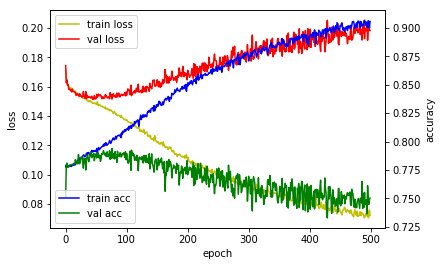

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


np.random.seed(20190730)




x_2 = x.astype(np.float32)
x_2_std = x_2.std()
x_2_mean = x_2.mean(0)
x_2 = (x_2 - x_2_mean)/(x_2_std)
x_2

x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3,
                                                    stratify = y)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=500,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선시도 3 - 상관관계가높은 feature만 사용 -> 큰 변화 없음
##위의 히트맵에서 종속변수와 pay1~6의 상관관계가 높았으므로  변수 6개로 압축

Train on 21000 samples, validate on 9000 samples
Epoch 1/500
21000/21000 [==============================] - 3s 161us/step - loss: 0.1503 - acc: 0.8134 - val_loss: 0.1385 - val_acc: 0.8197
Epoch 2/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1390 - acc: 0.8192 - val_loss: 0.1384 - val_acc: 0.8194
Epoch 3/500
21000/21000 [==============================] - 1s 49us/step - loss: 0.1387 - acc: 0.8208 - val_loss: 0.1388 - val_acc: 0.8200
Epoch 4/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1388 - acc: 0.8200 - val_loss: 0.1378 - val_acc: 0.8213
Epoch 5/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1386 - acc: 0.8200 - val_loss: 0.1383 - val_acc: 0.8197
Epoch 6/500
21000/21000 [==============================] - 1s 49us/step - loss: 0.1387 - acc: 0.8208 - val_loss: 0.1381 - val_acc: 0.8171
Epoch 7/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1383 - acc: 0.8193 - val_loss: 0.1389 - 

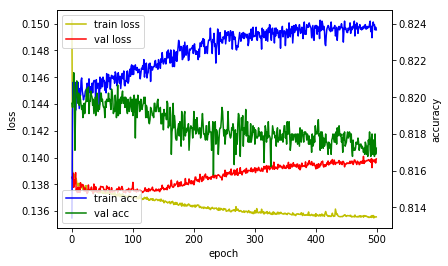

In [0]:
x_4 = x_1[:, 5:10]


x_train, x_test, y_train, y_test = train_test_split(x_4, y, test_size=0.3,
                                                    stratify = y)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=500,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선시도 4 - Randomforest 주요요인 13개 -> 큰 변화 없음

Train on 21000 samples, validate on 9000 samples
Epoch 1/500
21000/21000 [==============================] - 3s 164us/step - loss: 0.1459 - acc: 0.8104 - val_loss: 0.1370 - val_acc: 0.8194
Epoch 2/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1383 - acc: 0.8187 - val_loss: 0.1366 - val_acc: 0.8216
Epoch 3/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1375 - acc: 0.8199 - val_loss: 0.1372 - val_acc: 0.8189
Epoch 4/500
21000/21000 [==============================] - 1s 49us/step - loss: 0.1375 - acc: 0.8200 - val_loss: 0.1366 - val_acc: 0.8212
Epoch 5/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1370 - acc: 0.8199 - val_loss: 0.1385 - val_acc: 0.8171
Epoch 6/500
21000/21000 [==============================] - 1s 48us/step - loss: 0.1371 - acc: 0.8203 - val_loss: 0.1362 - val_acc: 0.8203
Epoch 7/500
21000/21000 [==============================] - 1s 47us/step - loss: 0.1365 - acc: 0.8209 - val_loss: 0.1374 - 

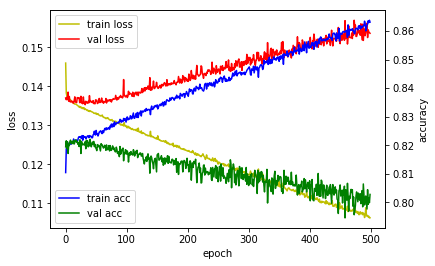

In [0]:
# [(0.2901644980524391, 'PAY_1'),
#  (0.1917798373518378, 'PAY_2'),
#  (0.12991214024018838, 'PAY_4'),
#  (0.10514048946554133, 'PAY_3'),
#  (0.08150234186931815, 'PAY_6'),
#  (0.06939232163316135, 'PAY_5'),
#  (0.03937138069161142, 'PAY_AMT1'),
#  (0.021320430320398886, 'PAY_AMT2'),
#  (0.017774118460816717, 'PAY_AMT3'),
#  (0.01601953156612733, 'LIMIT_BAL'),
#  (0.008145187629651725, 'PAY_AMT4'),
#  (0.005623476134287027, 'PAY_AMT5'),
#  (0.005488161615896499, 'PAY_AMT6'),
x_5 = x_1[:, [0, 5,6,7,8,9,10, -1, -2, -3, -4, -5, -6]]

x_train, x_test, y_train, y_test = train_test_split(x_5, y, test_size=0.3,
                                                    stratify = y)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=500,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선시도 5 - Random Oversampling of Minority -> acc 90 상승 
## 하지만 test 분리하지 않아 이후 결과값 신뢰할수 없음

In [0]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler


minmax_scale = MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))



df_majority = df_minmax[df_minmax['default payment next month'] == 0]
df_minority = df_minmax[df_minmax['default payment next month'] == 1]
df_minority_oversampling = resample(df_minority,
                                    replace=True,
                                    n_samples=23364,
                                    random_state=20190730)
df_oversample = pd.concat([df_majority, df_minority_oversampling])
print(df_oversample['default payment next month'].value_counts())

x = df_oversample.drop(['default payment next month'], axis=1).values
y = df_oversample['default payment next month'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=20190730)

1.0    23364
0.0    23364
Name: default payment next month, dtype: int64


In [0]:
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_jobs=1000,
                            random_state=20190730,
                            n_estimators=11,
                            verbose=False)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
a = accuracy_score(prediction, y_test)
a = a * 100
print(a)
confusion_matrix = confusion_matrix(y_test, prediction)
confusion_matrix

90.2774805620943


array([[6002,  985],
       [ 378, 6654]])

# 개선시도 6 - Random Oversampling of Minority to DNN -> acc 85로 상승
## 하지만 신뢰할 수 없음

W0731 00:20:53.900062 139754282850176 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 00:20:53.908411 139754282850176 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 00:20:53.953401 139754282850176 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



1.0    23364
0.0    23364
Name: default payment next month, dtype: int64


W0731 00:20:54.126689 139754282850176 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0731 00:20:54.231271 139754282850176 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 32709 samples, validate on 14019 samples
Epoch 1/700
32709/32709 [==============================] - 5s 163us/step - loss: 0.1997 - acc: 0.6970 - val_loss: 0.1962 - val_acc: 0.7048
Epoch 2/700
32709/32709 [==============================] - 1s 38us/step - loss: 0.1934 - acc: 0.7080 - val_loss: 0.1954 - val_acc: 0.7062
Epoch 3/700
32709/32709 [==============================] - 1s 39us/step - loss: 0.1925 - acc: 0.7079 - val_loss: 0.1950 - val_acc: 0.7045
Epoch 4/700
32709/32709 [==============================] - 1s 39us/step - loss: 0.1910 - acc: 0.7103 - val_loss: 0.1928 - val_acc: 0.7063
Epoch 5/700
32709/32709 [==============================] - 1s 39us/step - loss: 0.1895 - acc: 0.7125 - val_loss: 0.1918 - val_acc: 0.7096
Epoch 6/700
32709/32709 [==============================] - 1s 39us/step - loss: 0.1888 - acc: 0.7144 - val_loss: 0.1906 - val_acc: 0.7117
Epoch 7/700
32709/32709 [==============================] - 1s 40us/step - loss: 0.1879 - acc: 0.7146 - val_loss: 0.1904 -

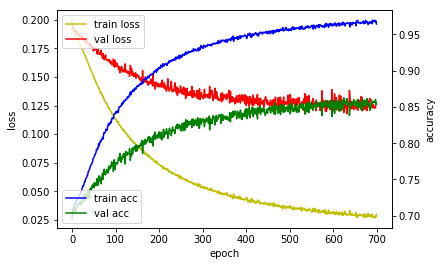

In [0]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense


minmax_scale = MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))



df_majority = df_minmax[df_minmax['default payment next month'] == 0]
df_minority = df_minmax[df_minmax['default payment next month'] == 1]
df_minority_oversampling = resample(df_minority,
                                    replace=True,
                                    n_samples=23364,
                                    random_state=20190730)
df_oversample = pd.concat([df_majority, df_minority_oversampling])
print(df_oversample['default payment next month'].value_counts())

x = df_oversample.drop(['default payment next month'], axis=1).values
y = df_oversample['default payment next month'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=20190730)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=700,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

1.0    23364
0.0    23364
Name: default payment next month, dtype: int64
Train on 32709 samples, validate on 14019 samples
Epoch 1/2000
32709/32709 [==============================] - 4s 135us/step - loss: 0.1988 - acc: 0.6983 - val_loss: 0.1962 - val_acc: 0.7039
Epoch 2/2000
32709/32709 [==============================] - 2s 49us/step - loss: 0.1939 - acc: 0.7061 - val_loss: 0.1975 - val_acc: 0.6998
Epoch 3/2000
32709/32709 [==============================] - 2s 49us/step - loss: 0.1924 - acc: 0.7085 - val_loss: 0.1940 - val_acc: 0.7062
Epoch 4/2000
32709/32709 [==============================] - 2s 49us/step - loss: 0.1910 - acc: 0.7108 - val_loss: 0.1927 - val_acc: 0.7047
Epoch 5/2000
32709/32709 [==============================] - 2s 49us/step - loss: 0.1898 - acc: 0.7121 - val_loss: 0.1913 - val_acc: 0.7083
Epoch 6/2000
32709/32709 [==============================] - 2s 48us/step - loss: 0.1887 - acc: 0.7139 - val_loss: 0.1924 - val_acc: 0.7070
Epoch 7/2000
32709/32709 [================

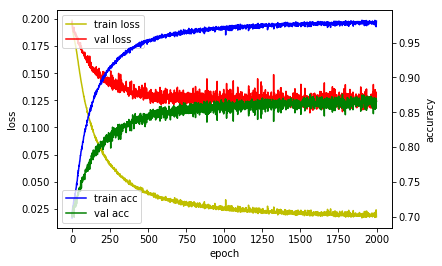

In [0]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler


minmax_scale = MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))



df_majority = df_minmax[df_minmax['default payment next month'] == 0]
df_minority = df_minmax[df_minmax['default payment next month'] == 1]
df_minority_oversampling = resample(df_minority,
                                    replace=True,
                                    n_samples=23364,
                                    random_state=20190730)
df_oversample = pd.concat([df_majority, df_minority_oversampling])
print(df_oversample['default payment next month'].value_counts())

x = df_oversample.drop(['default payment next month'], axis=1).values
y = df_oversample['default payment next month'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=20190730)


model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=2000,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 개선된 데이터를 적용하여 그리드서치

In [0]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler


minmax_scale = MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))



df_majority = df_minmax[df_minmax['default payment next month'] == 0]
df_minority = df_minmax[df_minmax['default payment next month'] == 1]
df_minority_oversampling = resample(df_minority,
                                    replace=True,
                                    n_samples=23364,
                                    random_state=20190730)
df_oversample = pd.concat([df_majority, df_minority_oversampling])
print(df_oversample['default payment next month'].value_counts())

x = df_oversample.drop(['default payment next month'], axis=1).values
y = df_oversample['default payment next month'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=20190730)

1.0    23364
0.0    23364
Name: default payment next month, dtype: int64


## 랜덤포레스트 91 -> 93

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = [
    {'n_estimators':[10, 50, 100]},
    {'bootstrap':[False], 'n_estimators':[30, 70, 100],
    },
]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           )
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'n_estimators': 100}

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
rf = RandomForestClassifier(n_estimators=100,
                            random_state=20190730,
                            bootstrap=False)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
# auc_rf = auc(fpr_rf, tpr_rf)
         
y_pred_rf_2 = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf_2))
print(classification_report(y_test,y_pred_rf_2))
print('acc : ', accuracy_score(y_test, y_pred_rf_2))
print('f1 : ',f1_score(y_test, y_pred_rf_2))

[[6419  568]
 [ 352 6680]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      6987
         1.0       0.92      0.95      0.94      7032

   micro avg       0.93      0.93      0.93     14019
   macro avg       0.93      0.93      0.93     14019
weighted avg       0.93      0.93      0.93     14019

('acc : ', 0.9343747770882374)
('f1 : ', 0.9355742296918768)


## 에이다부스트 70 -> 69 ?왜 하락하는지 알 수 없다

In [0]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier()

ada_param_grid = {'n_estimators':[10, 30, 50, 100],
                  'learning_rate':[0.0001, 0.001, 0.01, 0.1]}

grid_search = GridSearchCV(ada, param_grid=ada_param_grid, cv=5,
                          scoring='accuracy'
                          )
grid_search.fit(x_train, y_train)

grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
adb = AdaBoostClassifier(n_estimators=50)
adb.fit(x_train, y_train)

y_pred_adb = adb.predict_proba(x_test)[:, 1]
fpr_adb, tpr_adb, thresholds_adb = roc_curve(y_test, y_pred_adb)
auc_adb = auc(fpr_adb, tpr_adb)


y_pred_adb_2 = adb.predict(x_test)
print(confusion_matrix(y_test,y_pred_adb_2))
print(classification_report(y_test,y_pred_adb_2))
print(accuracy_score(y_test, y_pred_adb_2))
print(f1_score(y_test, y_pred_adb_2))

[[5567 1420]
 [2661 4371]]
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73      6987
         1.0       0.75      0.62      0.68      7032

   micro avg       0.71      0.71      0.71     14019
   macro avg       0.72      0.71      0.71     14019
weighted avg       0.72      0.71      0.71     14019

0.7088950709751052
0.6817437417141073


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
adb = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
adb.fit(x_train, y_train)

y_pred_adb = adb.predict_proba(x_test)[:, 1]
fpr_adb, tpr_adb, thresholds_adb = roc_curve(y_test, y_pred_adb)
auc_adb = auc(fpr_adb, tpr_adb)


y_pred_adb_2 = adb.predict(x_test)
print(confusion_matrix(y_test,y_pred_adb_2))
print(classification_report(y_test,y_pred_adb_2))
print(accuracy_score(y_test, y_pred_adb_2))
print(f1_score(y_test, y_pred_adb_2))

[[5850 1137]
 [3072 3960]]
              precision    recall  f1-score   support

         0.0       0.66      0.84      0.74      6987
         1.0       0.78      0.56      0.65      7032

   micro avg       0.70      0.70      0.70     14019
   macro avg       0.72      0.70      0.69     14019
weighted avg       0.72      0.70      0.69     14019

0.6997646051786861
0.652980460054415


# *기타 시도

# train set만 resampling - > acc박살

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
W0731 04:51:29.941905 140687815587712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 04:51:29.980643 140687815587712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 04:51:29.987653 140687815587712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The

1.0    16355
0.0    16355
Name: default payment next month, dtype: int64


W0731 04:51:30.209044 140687815587712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0731 04:51:30.308561 140687815587712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 32710 samples, validate on 9000 samples
Epoch 1/100
32710/32710 [==============================] - 5s 147us/step - loss: 0.2011 - acc: 0.6945 - val_loss: 0.1914 - val_acc: 0.7611
Epoch 2/100
32710/32710 [==============================] - 1s 35us/step - loss: 0.1947 - acc: 0.7060 - val_loss: 0.1820 - val_acc: 0.7613
Epoch 3/100
32710/32710 [==============================] - 1s 36us/step - loss: 0.1920 - acc: 0.7084 - val_loss: 0.2483 - val_acc: 0.5901
Epoch 4/100
32710/32710 [==============================] - 1s 36us/step - loss: 0.1903 - acc: 0.7109 - val_loss: 0.1845 - val_acc: 0.7534
Epoch 5/100
32710/32710 [==============================] - 1s 35us/step - loss: 0.1897 - acc: 0.7119 - val_loss: 0.1718 - val_acc: 0.7704
Epoch 6/100
32710/32710 [==============================] - 1s 36us/step - loss: 0.1875 - acc: 0.7155 - val_loss: 0.1883 - val_acc: 0.7447
Epoch 7/100
32710/32710 [==============================] - 1s 35us/step - loss: 0.1867 - acc: 0.7151 - val_loss: 0.1802 - 

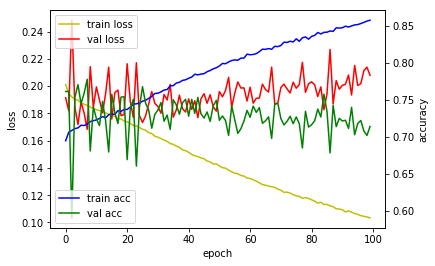

In [0]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense


minmax_scale = MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=list(df))

x = df_minmax.iloc[:,:-1]
y = df_minmax.iloc[:,-1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=20190730,
                                                    stratify=y)
x_train['default payment next month'] = y_train
x_train.shape
df_minmax = x_train


df_majority = df_minmax[df_minmax['default payment next month'] == 0]
df_minority = df_minmax[df_minmax['default payment next month'] == 1]
df_minority_oversampling = resample(df_minority,
                                    replace=True,
                                    n_samples=16355,
                                    random_state=20190730)
df_oversample = pd.concat([df_majority, df_minority_oversampling])
print(df_oversample['default payment next month'].value_counts())

x_train = df_oversample.drop(['default payment next month'], axis=1).values
y_train = df_oversample['default payment next month'].values

model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


# Supervised transformation based on random forests
rf = RandomForestClassifier(n_estimators=11,
                            random_state=20190730,
                            bootstrap=False)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
# auc_rf = auc(fpr_rf, tpr_rf)
         
y_pred_rf_2 = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf_2))
print(classification_report(y_test,y_pred_rf_2))
print('acc : ', accuracy_score(y_test, y_pred_rf_2))
print('f1 : ',f1_score(y_test, y_pred_rf_2))

[[6522  487]
 [1310  681]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      7009
         1.0       0.58      0.34      0.43      1991

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000

('acc : ', 0.8003333333333333)
('f1 : ', 0.4311490978157645)


# 드랍아웃 -> 큰 변화 없음

Train on 21000 samples, validate on 9000 samples
Epoch 1/100
21000/21000 [==============================] - 1s 65us/sample - loss: 0.1804 - acc: 0.7609 - precision: 0.2219 - recall: 0.0323 - val_loss: 0.1551 - val_acc: 0.7864 - val_precision: 0.7413 - val_recall: 0.0532
Epoch 2/100
21000/21000 [==============================] - 1s 41us/sample - loss: 0.1477 - acc: 0.8006 - precision: 0.6859 - recall: 0.1819 - val_loss: 0.1428 - val_acc: 0.8063 - val_precision: 0.6403 - val_recall: 0.2843
Epoch 3/100
21000/21000 [==============================] - 1s 41us/sample - loss: 0.1421 - acc: 0.8089 - precision: 0.6475 - recall: 0.2982 - val_loss: 0.1407 - val_acc: 0.8100 - val_precision: 0.6337 - val_recall: 0.3345
Epoch 4/100
21000/21000 [==============================] - 1s 41us/sample - loss: 0.1405 - acc: 0.8120 - precision: 0.6470 - recall: 0.3298 - val_loss: 0.1395 - val_acc: 0.8123 - val_precision: 0.6477 - val_recall: 0.3325
Epoch 5/100
21000/21000 [==============================] - 1s 4

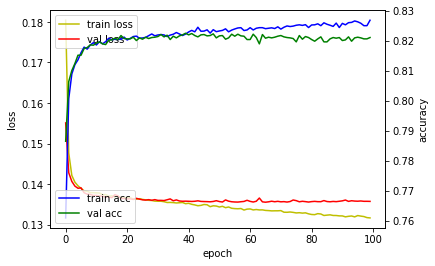

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score




model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss='mse',
              metrics=['acc',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')
                      ])

history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                    validation_data=(x_test, y_test),
                    )



fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 데이터 전처리 심화 -> acc하락
## 연속 데이터 이상점 제외(5%드랍)

In [0]:
df2 = df

down_quantiles = df2.quantile(0.05)
outliers_low = (df2 < down_quantiles)
df2[outliers_low] = np.nan
df2 = df2.dropna()
df2.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000,2.706200e+04,27062.000000,27062.000000,27062.000000,27062.000000,27062.000000
mean,169602.678294,1.607198,1.844320,1.547742,35.766204,0.351711,0.324255,0.304597,0.262397,0.226554,0.231062,54991.056648,52903.765649,50493.080334,46676.153130,43484.983445,41986.994235,5821.807627,5.907406e+03,5306.962013,4845.066662,4873.297909,5240.566403,0.220900
std,128436.472160,0.488382,0.743749,0.522005,9.101576,0.766439,0.806822,0.791109,0.761828,0.720194,0.716392,75500.622467,73068.626534,70399.454628,66195.297552,62546.129231,61162.599695,16579.016045,1.998464e+04,17402.712452,15020.083012,14764.554352,17578.259521,0.414861
min,20000.000000,1.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4717.000000,4096.250000,3794.500000,3267.750000,2511.250000,1973.250000,1086.250000,1.000000e+03,535.000000,390.000000,386.250000,299.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26661.500000,25846.000000,24057.500000,21192.500000,19676.000000,19197.000000,2306.000000,2.164000e+03,2000.000000,1686.000000,1733.000000,1631.500000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73411.500000,70222.500000,66762.250000,60476.500000,55879.250000,53336.000000,5216.000000,5.012000e+03,4967.500000,4300.000000,4374.000000,4200.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


(27062, 23)
(27062, 1)
Train on 18943 samples, validate on 8119 samples
Epoch 1/100
18943/18943 [==============================] - 1s 64us/sample - loss: 0.1457 - acc: 0.8040 - val_loss: 0.1421 - val_acc: 0.8091
Epoch 2/100
18943/18943 [==============================] - 1s 33us/sample - loss: 0.1345 - acc: 0.8238 - val_loss: 0.1401 - val_acc: 0.8149
Epoch 3/100
18943/18943 [==============================] - 1s 35us/sample - loss: 0.1342 - acc: 0.8240 - val_loss: 0.1411 - val_acc: 0.8134
Epoch 4/100
18943/18943 [==============================] - 1s 33us/sample - loss: 0.1328 - acc: 0.8269 - val_loss: 0.1396 - val_acc: 0.8133
Epoch 5/100
18943/18943 [==============================] - 1s 34us/sample - loss: 0.1324 - acc: 0.8268 - val_loss: 0.1404 - val_acc: 0.8127
Epoch 6/100
18943/18943 [==============================] - 1s 35us/sample - loss: 0.1318 - acc: 0.8279 - val_loss: 0.1401 - val_acc: 0.8135
Epoch 7/100
18943/18943 [==============================] - 1s 33us/sample - loss: 0.1313

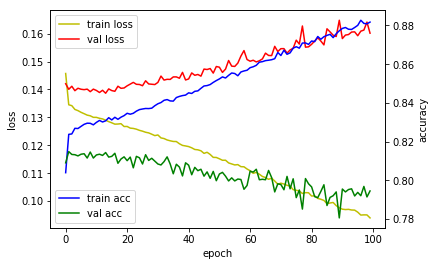

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split


x = df2.iloc[:, :-1]
x = x.values
print(x.shape)
y = df2.iloc[:, -1:]
y = y.values
print(y.shape)

x_1 = x.astype(np.float32)
x_1_max = x_1.max(0)
x_1_min = x_1.min(0)
x_1 = (x_1 - x_1_min)/(x_1_max - x_1_min)
x_1

np.random.seed(20190730)

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3,
                                                    stratify = y)

model = Sequential()
model.add(Dense(512, input_shape=((x_train.shape[1],)), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

Train on 21000 samples, validate on 9000 samples
Epoch 1/50
21000/21000 [==============================] - 3s 164us/sample - loss: 0.1520 - acc: 0.7993 - val_loss: 0.1387 - val_acc: 0.8137
Epoch 2/50
21000/21000 [==============================] - 3s 142us/sample - loss: 0.1428 - acc: 0.8110 - val_loss: 0.1388 - val_acc: 0.8130
Epoch 3/50
21000/21000 [==============================] - 3s 145us/sample - loss: 0.1405 - acc: 0.8162 - val_loss: 0.1374 - val_acc: 0.8188
Epoch 4/50
21000/21000 [==============================] - 3s 145us/sample - loss: 0.1402 - acc: 0.8155 - val_loss: 0.1365 - val_acc: 0.8217
Epoch 5/50
21000/21000 [==============================] - 3s 143us/sample - loss: 0.1394 - acc: 0.8200 - val_loss: 0.1370 - val_acc: 0.8200
Epoch 6/50
21000/21000 [==============================] - 3s 146us/sample - loss: 0.1392 - acc: 0.8198 - val_loss: 0.1365 - val_acc: 0.8198
Epoch 7/50
21000/21000 [==============================] - 3s 143us/sample - loss: 0.1391 - acc: 0.8198 - val_lo

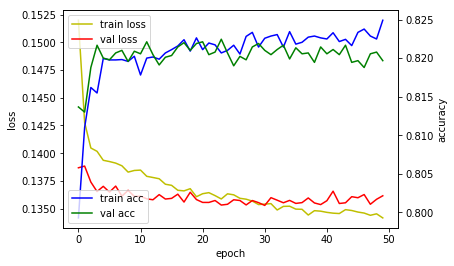

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D


model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=32, epochs=50,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

# 정리
1. 간단한 전처리 후 학습
## acc
### DNN : 82%, Random Forest : 81%, AdaBoost : 81%
## auc 
### DNN :  0.77 Random Forest : 0.76, AdaBoost : 0.76
##f1-score
### DNN : 0.46 Random Forest : 0.40, AdaBoost : 0.44

2. resampling 이후 학습 (신뢰할 수 없는 결과)
## acc DNN : 85%, RandomForest : 91%, AdaBoost ; 70%

3. 여러 가지 도전
    1. DNN 재설계 -> 개선 없음
    2. 주성분분석 -> 개선 없음
    3. 표준화 -> acc 하락
    4. 상관관계가 높은 feature 사용 -> 개선 없음
    5. Randomforest 주요요인 13개 사용 -> 개선 없음
    6. 그리드 서치 -> 개선 or 비개선
    7. train set만 resampling -> acc 하락
    8. Drop out -> 개선 없음
    9. 데이터 전처리 심화 (outlier 제외 5%) -> acc 하락

# 알고리즘 장단점 및 문제점

## 1. DNN
장점 : feature 추출이 자동으로 되며 변수가 연속변수와 범주변수 모두 분석 가능하다.<br>
단점 : 좋은 결과를 얻기위해 필요한 data의 양이 다른 알고리즘보다 많다.<br>
분석시 문제점 : 결과가 일정하지 않으며, 결과해석이 어렵다.

## 2. Random Forest
장점 : decision tree의 확장 개념으로 단일 decision tree보다 좋은 결과 즉, 분산 감소와 높은 정확도를 얻을 수 있다.<br>
단점 : 런타임이 다른 알고리즘에 비해 느리다.<br>
분석시 문제점 : 예측 모델링도구로써 성능은 훌륭하지만 설명도구로써의 역할은 부족하다.

## 3. AdaBoost<br>
장점 :  weak learner결과물에 가중치를 두어 더하여 좋은 결과를얻을 수 있다.<br>
단점 : 잡음이 많은 데이터와 이상점에 취약한 모습을 보인다<br>
분석시 문제점 :   새로운 데이터에 정확도가 떨어지는 것으로 봐서 잡음과 이상점에 민감한 것을 확인 할 수 있다.

# 더 나은 성능을 위해 고려해야 할 점
 1. 정석적인 smote를 하지않고 편의를 위하여 resampling을 통해 label의 불균형을 맞춰 주고있지만, 좀더 정확한 결과를 얻기위해서는 smote나 autoencoder 등을 통해 유의미한 변수를 생성함으로써 정확도와 f1-score등을 개선할 수 있을 것이다.
 2. domain지식을 확장하여 변수간의 관계를 재구성하여 새롭게 변수를 가공한다면 좀더 높은 결과를 얻을 수 있을 것으로 예상된다.
 3. DNN의 경우 설계에 따라 결과가 달라지므로 여러 경우의 설계를 하면 좀더 높은 성능을 낼 수 있을 것이다.

# 결과를 통해 모델에 가장 영향력을 주는 입력변수들은 어떤 것들이 있는지 그 변수들의 특징들로 유추할 수 있는 정보는? 
 Random Forest를 통해 가장 영향력이 높은 변수를 파악해보면 PAY변수로 확인된다. <br>
 이를 통해 유추해보면 과거 카드값을 지불했는지, 연체했는지가 default를 결정하는데 가장 큰 영향을 미친다고 볼 수 있다.

# 유사 적용 가능한 분야 및 사례들을 도출
현재까지 해결한 문제의 경우 다중변수 2진분류 문제이므로 많은 분야에 적용될 수 있을 것으로 생각된다. 게임산업의 경우 유저들의 게임이용데이터와 결제데이터를 활용하여 그 유저가 계속이용할 것인지를 예측할 수 있을 것이며, 마케팅 분야에서는 고객들의 구입내역과 개인정보를 통해 충성고객과 비충성고객을 분류하여 그에 맞춰 효율적으로 마케팅을 할 수 있을 것이다